Load swin transformer model

In [11]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import timm

# Define model loading function
def load_model(weights_path, model_name='vit_base_patch16_224', num_classes=5):
    model = timm.create_model(model_name, pretrained=False, num_classes=num_classes)
    model.load_state_dict(torch.load(weights_path, map_location='cpu'))
    model.eval()
    return model

# Example:
weights_path = 'best_vit_model.pth'  # Your model weight path
model_name = 'vit_base_patch16_224'  # Replace with your model name if different
model = load_model(weights_path, model_name)

Preprocessing for swin transformer and vit model

In [12]:
def predict_image(model, image_path, class_names):
    image = Image.open(image_path).convert('RGB')

    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    input_tensor = preprocess(image).unsqueeze(0)

    with torch.no_grad():
        output = model(input_tensor)
        probs = torch.nn.functional.softmax(output[0], dim=0)
        predicted_class = probs.argmax().item()
    
    label = class_names[predicted_class]

    return image, label

Vit transformer inferencing

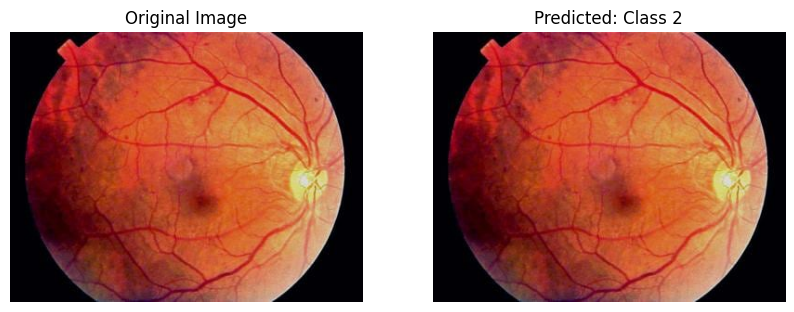

In [16]:
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
image_path = 'test images/31110tn.jpg'

original_image, predicted_label = predict_image(model, image_path, class_names)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(original_image)
axes[1].set_title(f'Predicted: {predicted_label}')
axes[1].axis('off')

plt.show()